In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv(r'C:\Users\Hari\Box Sync\Unsupervised Learning\Class\data\beers.csv')
df.head()

,Brand,Brewery,PercentAlcohol,Calories,Carbohydrates
0,Anchor Steam,Anchor,4.9,153,16.0
1,Anheuser Busch Natural Light,Anheuser Busch,4.2,95,3.2
2,Anheuser Busch Natural Ice,Anheuser Busch,5.9,157,8.9
3,Aspen Edge,Adolph Coors,4.1,94,2.6
4,Blatz Beer,Pabst,4.8,153,12.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
Brand             86 non-null object
Brewery           86 non-null object
PercentAlcohol    86 non-null float64
Calories          86 non-null int64
Carbohydrates     86 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.4+ KB


In [29]:
scale=StandardScaler()
d=df.drop(['Brand','Brewery'],axis=1)
d=scale.fit_transform(d)
d=pd.DataFrame(d,columns=['PercentAlcohol','Calories','Carbohydrates'])


In [30]:
cluster_range=range(1,20)
cluster_error=[]

In [35]:
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(d)
    cluster_error.append(clusters.inertia_)

In [36]:
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:10]

,num_clusters,cluster_error
0,1,258.000000
1,2,121.377419
2,3,88.235176
3,4,59.077160
4,5,39.866506
5,6,32.321725
6,7,28.216283
7,8,23.003136
8,9,19.307130
9,10,16.837204


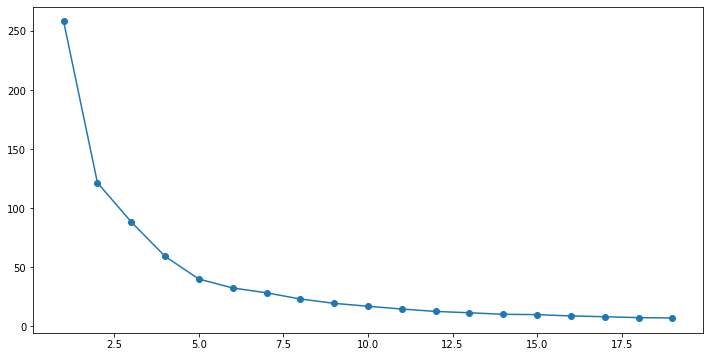

In [38]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')

In [40]:
kmeans=KMeans(n_clusters=4).fit(d)
centroids=kmeans.cluster_centers_
print('centroids: \n',centroids)

label=kmeans.labels_
print()
print('Labels: ',label)

centroids: 
 [[ 0.15946689  0.1538721   0.11077663]
 [-0.77819357 -1.29848644 -1.30109334]
 [-5.828537   -2.57183645  0.53084307]
 [ 0.77386601  1.17504334  1.11621867]]

Labels:  [3 1 0 1 0 3 0 0 1 1 0 1 0 3 1 0 3 0 1 0 3 3 0 0 0 0 0 1 1 1 0 0 3 0 3 3 1
 1 0 0 3 0 0 1 3 1 1 0 0 1 0 1 1 0 1 0 2 1 0 0 0 0 3 3 0 3 3 3 3 0 0 3 3 3
 0 1 0 0 0 3 0 0 0 0 1 0]


In [41]:
data=pd.read_csv(r'C:\Users\Hari\Box Sync\Unsupervised Learning\Class\data\iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
y=data['species']
X=data.drop('species',axis=1)

In [65]:
cluster_range=range(1,20)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_error.append(clusters.inertia_)
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:10]

,num_clusters,cluster_error
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.945954
6,7,34.312650
7,8,29.954086
8,9,28.091938
9,10,26.427203


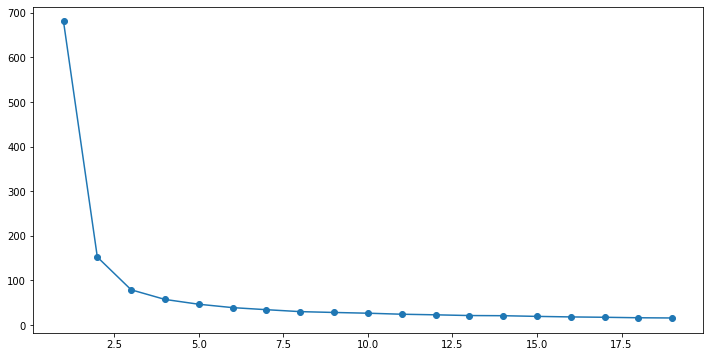

In [66]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')

In [67]:
kmeans=KMeans(n_clusters=3).fit(X)
centroids=kmeans.cluster_centers_
print('centroids: \n',centroids)

label=kmeans.labels_
print()
print('Labels: ',label)

centroids: 
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [71]:
print('confusion matrix: \n',confusion_matrix(y,label))
print('accuracy: \n',accuracy_score(y,label))

confusion matrix: 
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
accuracy: 
 0.24


In [1]:
#!pip install plotly

  Stored in directory: C:\Users\gsati\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [2]:
#!pip install imblearn